In [1]:
%matplotlib inline

## Problem
Data contains somethings

In [3]:
import networkx as nx
import numpy as np
import pandas as pd

## initial matrix

In [5]:
A = np.array([[2, 1, 0, 2, 1], [1, 0, 1, 2, 1], [1, 0, 0, 2, 1]])

In [6]:
A

array([[2, 1, 0, 2, 1],
       [1, 0, 1, 2, 1],
       [1, 0, 0, 2, 1]])

In [7]:
A.shape

(3, 5)

In [8]:
x,y  = A.shape
x,y

(3, 5)

## Convert to graph

In [9]:
import itertools
import time

In [14]:
virus = []
labels = {}
G = nx.grid_2d_graph(x,y)

for a,b in itertools.product(range(x), range(y)):
    data = A[a,b]
    coordinates = (a,b)
    labels[coordinates] = f'{data} {coordinates}'
    if data == 0:
        labels.pop(coordinates)
        G.remove_node(coordinates)
    if data == 2:
        virus.append(coordinates)

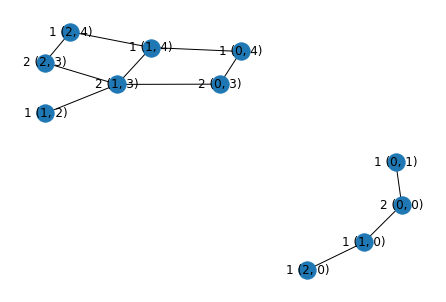

In [15]:
nx.draw(G, labels=labels)

In [16]:
G.nodes()

NodeView(((0, 0), (0, 1), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 3), (2, 4)))

In [17]:
virus

[(0, 0), (0, 3), (1, 3), (2, 3)]

## Test 1: shortest path

In [29]:
df = pd.DataFrame(nx.floyd_warshall_numpy(G), columns=G.nodes(), index=G.nodes())

In [30]:
df

0                   1                   2          
       0    1    3    4    0    2    3    4    0    3    4
0 0  0.0  1.0  inf  inf  1.0  inf  inf  inf  2.0  inf  inf
  1  1.0  0.0  inf  inf  2.0  inf  inf  inf  3.0  inf  inf
  3  inf  inf  0.0  1.0  inf  2.0  1.0  2.0  inf  2.0  3.0
  4  inf  inf  1.0  0.0  inf  3.0  2.0  1.0  inf  3.0  2.0
1 0  1.0  2.0  inf  inf  0.0  inf  inf  inf  1.0  inf  inf
  2  inf  inf  2.0  3.0  inf  0.0  1.0  2.0  inf  2.0  3.0
  3  inf  inf  1.0  2.0  inf  1.0  0.0  1.0  inf  1.0  2.0
  4  inf  inf  2.0  1.0  inf  2.0  1.0  0.0  inf  2.0  1.0
2 0  2.0  3.0  inf  inf  1.0  inf  inf  inf  0.0  inf  inf
  3  inf  inf  2.0  3.0  inf  2.0  1.0  2.0  inf  0.0  1.0
  4  inf  inf  3.0  2.0  inf  3.0  2.0  1.0  inf  1.0  0.0

In [31]:
df.columns

MultiIndex([(0, 0),
            (0, 1),
            (0, 3),
            (0, 4),
            (1, 0),
            (1, 2),
            (1, 3),
            (1, 4),
            (2, 0),
            (2, 3),
            (2, 4)],
           )

In [34]:
df[virus].T

0                   1                   2          
       0    1    3    4    0    2    3    4    0    3    4
0 0  0.0  1.0  inf  inf  1.0  inf  inf  inf  2.0  inf  inf
  3  inf  inf  0.0  1.0  inf  2.0  1.0  2.0  inf  2.0  3.0
1 3  inf  inf  1.0  2.0  inf  1.0  0.0  1.0  inf  1.0  2.0
2 3  inf  inf  2.0  3.0  inf  2.0  1.0  2.0  inf  0.0  1.0

In [32]:
df[virus].T.min().max()

2.0

## Test 2

In [35]:
virus

[(0, 0), (0, 3), (1, 3), (2, 3)]

In [36]:
data = []
for item in virus:
    data.append(nx.shortest_path_length(G, item))

In [41]:
df = pd.DataFrame(data)
df

,"(0, 0)","(1, 0)","(0, 1)","(2, 0)","(0, 3)","(1, 3)","(0, 4)","(2, 3)","(1, 2)","(1, 4)","(2, 4)"
0,0.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2.0,2.0,2.0,3.0
2,NaN,NaN,NaN,NaN,1.0,0.0,2.0,1.0,1.0,1.0,2.0
3,NaN,NaN,NaN,NaN,2.0,1.0,3.0,0.0,2.0,2.0,1.0


In [38]:
len(df.columns)

11

In [39]:
len(G.nodes())

11

In [42]:
df.min()

(0, 0)    0.0
(1, 0)    1.0
(0, 1)    1.0
(2, 0)    2.0
(0, 3)    0.0
(1, 3)    0.0
(0, 4)    1.0
(2, 3)    0.0
(1, 2)    1.0
(1, 4)    1.0
(2, 4)    1.0
dtype: float64

In [43]:
df.min().max()

2.0